In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Variables
r_ball_m = 0.1066       # [m]
m_ball_kg = 0.28        # [kg]
rho_h20_kgpm3 = 997     # [kg/m^3]
coeff_drag = 0.5        # [unitless]

# Constants
g = 9.81    # [m/s^2]

# Derived values
cross_section_area_ball_m2 = np.pi*np.power(r_ball_m, 2)
volume_ball_m3 = (4/3)*np.pi*np.power(r_ball_m, 3)

force_buoyancy_N = rho_h20_kgpm3 * g * volume_ball_m3
force_g_N = m_ball_kg * g

In [3]:
time_points_sec = np.linspace(0, 0.15, 100)
delta_time_sec = time_points_sec[1] - time_points_sec[0]
print(delta_time_sec)

velocity_values_mps = np.zeros_like(time_points_sec)
acceleration_values_mps2 = np.zeros_like(time_points_sec)
force_net_values_N = np.zeros_like(time_points_sec)

0.0015151515151515152


In [4]:
def calculate_velocity_mps(acceleration_mps2, delta_time_sec):
    return acceleration_mps2 * delta_time_sec

def calculate_force_drag_N(velocity_mps):
    return (1/2) * rho_h20_kgpm3 * np.power(velocity_mps, 2) * coeff_drag * cross_section_area_ball_m2

def calculate_force_net_N(time_point, velocity_value_mps):
    # No initial velocity, therefore no drag force at initial time (assumption)
    if time_point == 0.0: 
        return force_buoyancy_N - force_g_N

    force_drag_N = calculate_force_drag_N(velocity_value_mps)
    return force_buoyancy_N - (force_g_N + force_drag_N)

def calculate_acceleration_mps2(force_net_N):
    return force_net_N/m_ball_kg

In [5]:
for i in range(0, len(time_points_sec)):
    
    velocity_ball_mps = 0.0 
    if i > 0:
        velocity_ball_mps = calculate_velocity_mps(acceleration_values_mps2[i-1], delta_time_sec) + velocity_values_mps[i-1]
    
    velocity_values_mps[i] = velocity_ball_mps

    force_net_N = calculate_force_net_N(time_points_sec[i], velocity_ball_mps)
    force_net_values_N[i] = force_net_N

    acceleration_ball_mps2 = force_net_N/m_ball_kg
    acceleration_values_mps2[i] = acceleration_ball_mps2 
    
print(force_net_values_N)

[4.68809275e+01 4.63082793e+01 4.46182287e+01 4.19328008e+01
 3.84633692e+01 3.44752822e+01 3.02455206e+01 2.60246716e+01
 2.20112973e+01 1.83413512e+01 1.50904549e+01 1.22843116e+01
 9.91236563e+00 7.94108534e+00 6.32489513e+00 5.01412624e+00
 3.96018681e+00 3.11851913e+00 2.44998131e+00 1.92120777e+00
 1.50437004e+00 1.17662941e+00 9.19468121e-01 7.18009223e-01
 5.60384383e-01 4.37176327e-01 3.40943592e-01 2.65824809e-01
 2.07214632e-01 1.61501535e-01 1.25857573e-01 9.80709372e-02
 7.64132687e-02 5.95349357e-02 4.63826177e-02 3.61345989e-02
 2.81500541e-02 2.19293568e-02 1.70830447e-02 1.33075772e-02
 1.03664080e-02 8.07521628e-03 6.29038675e-03 4.90002670e-03
 3.81696273e-03 2.97328217e-03 2.31607888e-03 1.80413818e-03
 1.40535373e-03 1.09471492e-03 8.52738876e-04 6.64248839e-04
 5.17422517e-04 4.03050694e-04 3.13959688e-04 2.44561450e-04
 1.90503092e-04 1.48393882e-04 1.15592569e-04 9.00417223e-05
 7.01386888e-05 5.46350656e-05 4.25583985e-05 3.31511861e-05
 2.58233662e-05 2.011530

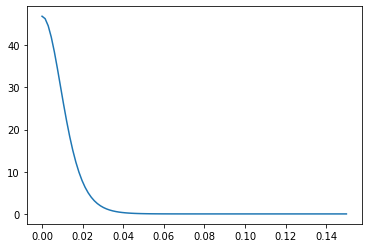

In [6]:
plt.plot(time_points_sec, force_net_values_N)

### Forces

In [ ]:
# Constant forces 
F_buoyancy_N = rho_h20_kgpm3 * g * volume_ball_m3
F_g_N = m_ball_kg * g

### Determining behavior at terminal velocity

In [ ]:
# Determining terminal velocity of ball underwater 
v_ball_mps_numerator = 2*(F_buoyancy_N - F_g_N)
v_ball_mps_denominator = rho_h20_kgpm3*coeff_drag*np.pi*np.power(r_ball_m, 2)
v_ball_mps = np.sqrt(v_ball_mps_numerator/v_ball_mps_denominator)
v_ball_mps_string = "{:.3f}".format(v_ball_mps)

print("Terminal velocity of ball: " + v_ball_mps_string + " m/s")